# **K-pop Phenomenon On Youtube:**
## US Youtube Trending Videos Dataset Analysis and Storytelling

---
K-pop, which means Korean popular music, has been ... ...   

While browsing the dataset, we were surprised to find there are a large ammount of K-pop videos shown up on US Youtube Trending Page. 
...

---

## **1 Asking Questions**

- **Are Kpop videos the all-rouder top-ranker?**

    - Which videos rank top according to ***the number of views, likes, comments*** and ***times of appearance*** on the trending page?
    - What are the ***correlations*** between these rankings?

- **XXX** 

    - List item
    - List item


- **XXX**

    - List item
    - List item

## **2 Preparing Data**

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-info">
⏰
<b>Notice:</b> The cleaned dataset is 90MB large, so it may minutes to load. 
</div>

In [3]:
# Read the cleaned dataset
# The Raw Data Wrangling process could be checked here:

df_us = pd.read_csv('https://github.com/zhouhe018/damg6105/releases/download/cleaned_data/US_youtube_trending_data.csv', index_col=[0])
df_us.head()

,video_id,video_title,publish_on,channel_id,channel_title,trend_on,tags,view_count,likes,dislikes,comment_count,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,UCbg_UMjlHJg_19SZckaKajg,XXL,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...,Howto & Style


In [4]:
# Generate descriptive statistics

pd.set_option('display.float_format', lambda x : '%.2f' % x)
df_us.describe()

,view_count,likes,dislikes,comment_count
count,66956.00,66956.00,66956.00,66956.00
mean,2853531.29,153926.29,3368.60,15492.53
std,6612078.93,419486.59,14455.06,109155.64
min,38510.00,0.00,0.00,0.00
25%,567141.00,22017.00,399.00,1937.00
50%,1168835.50,54491.50,924.00,4377.00
75%,2612976.25,137667.00,2454.00,10394.00
max,264407389.00,16021534.00,879354.00,6738537.00


## **3 Analyzing and Exploring**

### **3.1 Are Kpop videos the all-rouder top-ranker?**

(1) Top 5 **Most-Viewed** Trending Videos

In [5]:
# Define the function to highlight the K-pop video title in the ranking table

def highlight_kpop(v):
    ls_kpop = ['BTS','BLACKPINK','LISA','ROSÉ','EXO']
    color = ''
    for str in ls_kpop:
        if str in v:
            color = '#B0E0E6'
    return f"background-color: {color};" 

In [6]:
# Sort by "view_count" in descending order
df_viewed = df_us[['video_id','video_title','channel_title','view_count']].sort_values(by= 'view_count', ascending= False).drop_duplicates(subset = 'video_id').reset_index(drop = True)

# Show Top5
df_viewed_show = df_viewed.head()
df_viewed_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,view_count
0,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,264407389
1,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,232649205
2,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,184778248
3,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,150622781
4,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,140685439


(2) Top 5 **Most-liked** Trending Videos

In [7]:
# Sort by "likes" in descending order
df_liked = df_us[['video_id','video_title','channel_title','likes']].sort_values(by= 'likes', ascending= False).drop_duplicates(subset = 'video_id').reset_index(drop = True)

# Show Top5
df_liked_show = df_liked.head()
df_liked_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,likes
0,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,16021534
1,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,15735533
2,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,11795670
3,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,11405030
4,BLACKPINK – ‘Lovesick Girls’ M/V,BLACKPINK,9217876


(3) Top 5 **Most-commented** Trending Videos

In [8]:
# Sort by "comment_count" in descending order
df_commented = df_us[['video_id','video_title','channel_title','comment_count']].sort_values(by= 'comment_count', ascending= False).drop_duplicates(subset = 'video_id').reset_index(drop = True)

# Show Top5
df_commented_show = df_commented.head()
df_commented_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,comment_count
0,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,6738537
1,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,6065230
2,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,4160903
3,GAME (Full Video) Shooter Kahlon | Sidhu Moose Wala | Hunny PK Films | Gold Media | 5911 Records,5911 Records,3431431
4,EXO 엑소 'Don't fight the feeling' MV,SMTOWN,2857602


(4) Top 5 **Most-frequently-trending** Trending Videos

In [9]:
# Count the number of time that the video appearred on the trending page
trending_times = df_us['video_id'].value_counts()

# Sort by "trending_time" in descending order
df_trended = trending_times.rename_axis('video_id').reset_index(name='trending_times')
df_trended = pd.merge(df_viewed, df_trended, how = 'left',on = ['video_id']).drop(columns = 'view_count').sort_values(by= 'trending_times', ascending= False).reset_index(drop = True)

# Show Top5
df_trended_show = df_trended.head()
df_trended_show.style.hide_columns('video_id').bar(color = 'yellow').applymap(highlight_kpop, subset=['video_title'])

,video_title,channel_title,trending_times
0,"Floyd Mayweather vs Logan Paul: Fight goes the distance [Highlights, recap] | CBS Sports HQ",CBS Sports HQ,35
1,Israeli Iron Dome filmed intercepting rockets from Gaza,The Telegraph,34
2,"India claim stunning series win, end Australia's Gabba streak | Vodafone Test Series 2020-21",cricket.com.au,34
3,Justin Bieber - Holy ft. Chance The Rapper,JustinBieberVEVO,27
4,Golden Buzzer: Nightbirde's Original Song Makes Simon Cowell Emotional - America's Got Talent 2021,America's Got Talent,24


From the rankings above, we could clearly see that:
- K-pop trending videos **truly occupied** the rankings of **views, likes, and comments**. For example, "Butter", "Dynamite" and "Life Goes On" from BTS were all on the top 5 lists.  
- However, the ranking of **trending frequency** was very different from the other three. There appeared to be none K-pop videos even on the top 10 list.

Here comes the question:  
**What are the correlations between these ranking indicators?**

In [10]:
# Generate a dataframe in the format for correlation analysis

def merge_all(df_list, column_list):
    df_merge = df_list[0]
    for i in range(1, len(df_list)):
        df_merge = pd.merge(df_merge, df_list[i], how = 'left', on = column_list)
    return df_merge 

df_list = [df_viewed, df_liked, df_commented, df_trended]
column_list = ['video_id', 'video_title', 'channel_title']

df_merge = merge_all(df_list, column_list)
df_corr = df_merge[['view_count', 'likes', 'comment_count', 'trending_times']]

Text(0.5, 1, 'Correlation Heatmap')

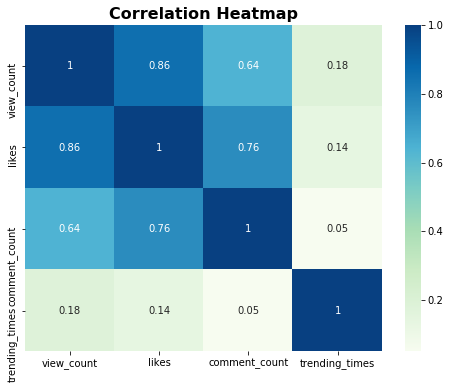

In [12]:
# Calculate and display the correlation matrix
corr = np.corrcoef(df_corr)

f, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(df_corr.corr(), annot= True, cmap = 'GnBu')
ax.set_title('Correlation Heatmap', fontsize = 16, fontweight = 'bold')

From the correlation heatmap, we could clearly see that🇰
- The number of views, likes and comments are highly correlated to each other.
- The number of trending times shown very low correlations to other three.

Thus, it makes sense that the trending time ranking is totally different from other three rankings.

### **3.2 XXX**

### **3.3 XXX**

## **4 Conclusion**

- **K-pop trending videos are top-rankers but not on all levels.**
    - They **truly occupied** the rankings of **views, likes, and comments**. For example, "Butter", "Dynamite" and "Life Goes On" from BTS were all on the top 5 lists.  
    - However, the ranking of **trending frequency** was very different from the other three. There appeared to be none K-pop videos even on the top 10 list.

- **XXX**
- **XXX**   

## **Reference**

https://en.wikipedia.org/wiki/K-pop  

https://www.kaggle.com/yogidsba/pandas-tutorial-and-cheat-sheet